In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
# generate a list of column names
new_columns = list(range(-80, 19))

In [3]:
data= pd.read_csv(r"D:\ten organism\train data\perez(RNA) bac vs. shuffled ten.csv")
downstream= pd.read_csv(r"D:\downstream control\train organism\train_downstream_perez(RNA).csv")

In [4]:
data.isnull().values.any()

False

In [5]:
data.head(5)

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-14.4,-15.4,-13.7,-13.7,-14.2,-15.6,-16.9,-11.1,-14.4,-13.7,...,-16.9,-15.6,-14.2,-14.0,-16.9,-14.4,-13.7,-14.0,-14.2,1
1,-16.0,-13.7,-15.4,-13.7,-14.4,-16.9,-14.4,-15.4,-14.4,-14.2,...,-14.4,-13.7,-13.7,-13.8,-15.6,-14.2,-13.7,-15.4,-13.7,1
2,-14.0,-13.7,-13.7,-14.2,-14.4,-13.8,-14.0,-14.2,-14.0,-13.7,...,-14.4,-13.8,-13.7,-16.0,-15.4,-16.0,-13.7,-15.4,-14.4,1
3,-13.7,-13.7,-13.8,-15.6,-16.9,-15.6,-16.9,-14.4,-13.7,-13.7,...,-13.7,-16.0,-13.8,-14.0,-13.7,-16.0,-13.7,-15.4,-14.4,1
4,-14.2,-13.8,-14.0,-13.7,-16.0,-13.7,-15.4,-16.0,-13.7,-15.4,...,-14.4,-13.7,-15.4,-16.0,-13.7,-14.0,-16.9,-15.6,-16.9,1


In [6]:
downstream.head(5)

,150,151,152,153,154,155,156,157,158,159,...,239,240,241,242,243,244,245,246,247,248
0,-14.0,-13.8,-16.0,-15.4,-14.2,-14.4,-15.4,-13.7,-13.7,-16.0,...,-14.0,-16.9,-11.1,-15.6,-11.1,-11.1,-14.2,-13.7,-14.0,-13.8
1,-11.1,-14.2,-14.0,-14.2,-13.7,-14.0,-11.1,-14.2,-13.7,-13.8,...,-14.4,-16.9,-11.1,-15.6,-16.9,-14.4,-15.4,-16.0,-13.8,-15.6
2,-14.4,-11.1,-14.2,-13.7,-14.0,-14.2,-13.8,-14.4,-13.7,-13.8,...,-13.7,-13.7,-13.8,-14.4,-14.0,-16.9,-14.0,-13.7,-14.4,-14.2
3,-13.8,-14.4,-14.2,-13.7,-15.4,-13.7,-13.7,-14.4,-13.8,-13.7,...,-15.6,-16.9,-14.0,-14.4,-16.9,-14.0,-13.7,-13.7,-16.0,-13.7
4,-13.7,-13.7,-14.0,-14.2,-13.8,-15.6,-16.9,-14.0,-14.2,-14.0,...,-14.0,-14.2,-14.0,-14.4,-14.2,-15.4,-14.4,-14.2,-15.4,-16.0


### Preprocessing Promoter data

In [7]:
promoter_seq = data[data['label'] == 1]
promoter_seq.shape

(14669, 100)

In [8]:
promoter_no_label=promoter_seq.drop(columns=['label'])
promoter_no_label.columns=new_columns
promoter_no_label.shape

(14669, 99)

In [9]:
promoter_without_label=promoter_no_label
promoter_without_label.shape

(14669, 99)

In [10]:
promoter_without_label['label']=1

In [11]:
promoter= promoter_without_label
promoter['label']=promoter['label'].astype(int)
promoter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14669 entries, 0 to 14668
Data columns (total 100 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   -80     14669 non-null  float64
 1   -79     14669 non-null  float64
 2   -78     14669 non-null  float64
 3   -77     14669 non-null  float64
 4   -76     14669 non-null  float64
 5   -75     14669 non-null  float64
 6   -74     14669 non-null  float64
 7   -73     14669 non-null  float64
 8   -72     14669 non-null  float64
 9   -71     14669 non-null  float64
 10  -70     14669 non-null  float64
 11  -69     14669 non-null  float64
 12  -68     14669 non-null  float64
 13  -67     14669 non-null  float64
 14  -66     14669 non-null  float64
 15  -65     14669 non-null  float64
 16  -64     14669 non-null  float64
 17  -63     14669 non-null  float64
 18  -62     14669 non-null  float64
 19  -61     14669 non-null  float64
 20  -60     14669 non-null  float64
 21  -59     14669 non-null  float64
 2

### Preprocessing Downstream Data

In [12]:
downstream

,150,151,152,153,154,155,156,157,158,159,...,239,240,241,242,243,244,245,246,247,248
0,-14.0,-13.8,-16.0,-15.4,-14.2,-14.4,-15.4,-13.7,-13.7,-16.0,...,-14.0,-16.9,-11.1,-15.6,-11.1,-11.1,-14.2,-13.7,-14.0,-13.8
1,-11.1,-14.2,-14.0,-14.2,-13.7,-14.0,-11.1,-14.2,-13.7,-13.8,...,-14.4,-16.9,-11.1,-15.6,-16.9,-14.4,-15.4,-16.0,-13.8,-15.6
2,-14.4,-11.1,-14.2,-13.7,-14.0,-14.2,-13.8,-14.4,-13.7,-13.8,...,-13.7,-13.7,-13.8,-14.4,-14.0,-16.9,-14.0,-13.7,-14.4,-14.2
3,-13.8,-14.4,-14.2,-13.7,-15.4,-13.7,-13.7,-14.4,-13.8,-13.7,...,-15.6,-16.9,-14.0,-14.4,-16.9,-14.0,-13.7,-13.7,-16.0,-13.7
4,-13.7,-13.7,-14.0,-14.2,-13.8,-15.6,-16.9,-14.0,-14.2,-14.0,...,-14.0,-14.2,-14.0,-14.4,-14.2,-15.4,-14.4,-14.2,-15.4,-16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14664,-15.4,-13.7,-14.4,-16.9,-14.0,-14.4,-11.1,-13.8,-13.7,-14.4,...,-14.0,-14.2,-14.0,-13.8,-13.7,-14.4,-16.9,-11.1,-11.1,-14.4
14665,-14.2,-13.7,-14.0,-13.8,-14.2,-14.4,-13.8,-11.1,-14.4,-14.0,...,-15.4,-13.7,-16.0,-13.8,-14.0,-14.2,-11.1,-14.0,-16.0,-13.8
14666,-13.7,-13.7,-13.7,-13.7,-14.4,-11.1,-16.9,-15.6,-13.8,-16.0,...,-13.7,-16.0,-14.0,-14.2,-13.8,-14.4,-14.0,-13.8,-13.7,-14.4
14667,-15.6,-14.2,-13.7,-15.4,-14.4,-11.1,-14.2,-13.7,-14.0,-14.2,...,-16.0,-15.4,-13.7,-13.7,-13.7,-13.7,-16.0,-13.8,-14.4,-13.8


In [13]:
downstream.columns= new_columns
downstream_no_label=downstream
downstream['label']= 0
downstream['label']= downstream['label'].astype(int)

In [14]:
downstream

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-14.0,-13.8,-16.0,-15.4,-14.2,-14.4,-15.4,-13.7,-13.7,-16.0,...,-16.9,-11.1,-15.6,-11.1,-11.1,-14.2,-13.7,-14.0,-13.8,0
1,-11.1,-14.2,-14.0,-14.2,-13.7,-14.0,-11.1,-14.2,-13.7,-13.8,...,-16.9,-11.1,-15.6,-16.9,-14.4,-15.4,-16.0,-13.8,-15.6,0
2,-14.4,-11.1,-14.2,-13.7,-14.0,-14.2,-13.8,-14.4,-13.7,-13.8,...,-13.7,-13.8,-14.4,-14.0,-16.9,-14.0,-13.7,-14.4,-14.2,0
3,-13.8,-14.4,-14.2,-13.7,-15.4,-13.7,-13.7,-14.4,-13.8,-13.7,...,-16.9,-14.0,-14.4,-16.9,-14.0,-13.7,-13.7,-16.0,-13.7,0
4,-13.7,-13.7,-14.0,-14.2,-13.8,-15.6,-16.9,-14.0,-14.2,-14.0,...,-14.2,-14.0,-14.4,-14.2,-15.4,-14.4,-14.2,-15.4,-16.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14664,-15.4,-13.7,-14.4,-16.9,-14.0,-14.4,-11.1,-13.8,-13.7,-14.4,...,-14.2,-14.0,-13.8,-13.7,-14.4,-16.9,-11.1,-11.1,-14.4,0
14665,-14.2,-13.7,-14.0,-13.8,-14.2,-14.4,-13.8,-11.1,-14.4,-14.0,...,-13.7,-16.0,-13.8,-14.0,-14.2,-11.1,-14.0,-16.0,-13.8,0
14666,-13.7,-13.7,-13.7,-13.7,-14.4,-11.1,-16.9,-15.6,-13.8,-16.0,...,-16.0,-14.0,-14.2,-13.8,-14.4,-14.0,-13.8,-13.7,-14.4,0
14667,-15.6,-14.2,-13.7,-15.4,-14.4,-11.1,-14.2,-13.7,-14.0,-14.2,...,-15.4,-13.7,-13.7,-13.7,-13.7,-16.0,-13.8,-14.4,-13.8,0


### Plotting Graph

In [15]:
for_line= pd.DataFrame(promoter_no_label.mean())
downstream_line= pd.DataFrame(downstream_no_label.mean())

In [16]:
for_line.reset_index(drop=False, inplace=True)
for_line.drop(for_line.index[-1], inplace=True)
for_line['index']=for_line['index'].astype(int)

downstream_line.reset_index(drop=False, inplace=True)
downstream_line.drop(downstream_line.index[-1], inplace=True)

for_line

,index,0
0,-80,-14.106340
1,-79,-14.098998
2,-78,-14.116450
3,-77,-14.110805
4,-76,-14.116518
...,...,...
94,14,-14.079003
95,15,-14.092713
96,16,-14.099611
97,17,-14.063958


In [17]:
downstream_columns= list(range(150,249))
downstream_line['downstream position']= downstream_columns
downstream_line['index']=downstream_line['index'].astype(int)
downstream_line

,index,0,downstream position
0,-80,-14.092467,150
1,-79,-14.107778,151
2,-78,-14.095460,152
3,-77,-14.101847,153
4,-76,-14.121801,154
...,...,...,...
94,14,-14.122721,244
95,15,-14.112053,245
96,16,-14.112550,246
97,17,-14.142695,247


In [18]:
downstream_line.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                99 non-null     int32  
 1   0                    99 non-null     float64
 2   downstream position  99 non-null     int64  
dtypes: float64(1), int32(1), int64(1)
memory usage: 2.1 KB


In [19]:
for_line.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   99 non-null     int32  
 1   0       99 non-null     float64
dtypes: float64(1), int32(1)
memory usage: 1.3 KB


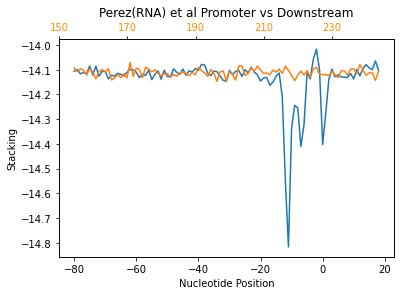

In [20]:
import matplotlib.ticker as ticker

# create the Seaborn line plots
plot = sns.lineplot(x='index', y=0, data=for_line)
plot = sns.lineplot(x='index', y=0, data=downstream_line)

# create a twin Axes object for the new x-axis
ax2 = plot.twiny()

# set the new x-axis tick positions and labels
ax2.set_xticks(downstream_line.index)
ax2.set_xticklabels(downstream_line['downstream position'], color='darkorange')

# set the gap between the tick labels
ax2.xaxis.set_major_locator(ticker.MultipleLocator(20))

# set the x-axis and y-axis labels and title
plot.set(xlabel="Nucleotide Position", ylabel="Stacking", title='Perez(RNA) et al Promoter vs Downstream')

# show the plot
plt.show()


### Preparing Training Data

In [21]:
data= pd.concat([promoter,downstream])

In [22]:
data.reset_index(drop=True, inplace=True)

In [23]:
data

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-14.4,-15.4,-13.7,-13.7,-14.2,-15.6,-16.9,-11.1,-14.4,-13.7,...,-16.9,-15.6,-14.2,-14.0,-16.9,-14.4,-13.7,-14.0,-14.2,1
1,-16.0,-13.7,-15.4,-13.7,-14.4,-16.9,-14.4,-15.4,-14.4,-14.2,...,-14.4,-13.7,-13.7,-13.8,-15.6,-14.2,-13.7,-15.4,-13.7,1
2,-14.0,-13.7,-13.7,-14.2,-14.4,-13.8,-14.0,-14.2,-14.0,-13.7,...,-14.4,-13.8,-13.7,-16.0,-15.4,-16.0,-13.7,-15.4,-14.4,1
3,-13.7,-13.7,-13.8,-15.6,-16.9,-15.6,-16.9,-14.4,-13.7,-13.7,...,-13.7,-16.0,-13.8,-14.0,-13.7,-16.0,-13.7,-15.4,-14.4,1
4,-14.2,-13.8,-14.0,-13.7,-16.0,-13.7,-15.4,-16.0,-13.7,-15.4,...,-14.4,-13.7,-15.4,-16.0,-13.7,-14.0,-16.9,-15.6,-16.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29333,-15.4,-13.7,-14.4,-16.9,-14.0,-14.4,-11.1,-13.8,-13.7,-14.4,...,-14.2,-14.0,-13.8,-13.7,-14.4,-16.9,-11.1,-11.1,-14.4,0
29334,-14.2,-13.7,-14.0,-13.8,-14.2,-14.4,-13.8,-11.1,-14.4,-14.0,...,-13.7,-16.0,-13.8,-14.0,-14.2,-11.1,-14.0,-16.0,-13.8,0
29335,-13.7,-13.7,-13.7,-13.7,-14.4,-11.1,-16.9,-15.6,-13.8,-16.0,...,-16.0,-14.0,-14.2,-13.8,-14.4,-14.0,-13.8,-13.7,-14.4,0
29336,-15.6,-14.2,-13.7,-15.4,-14.4,-11.1,-14.2,-13.7,-14.0,-14.2,...,-15.4,-13.7,-13.7,-13.7,-13.7,-16.0,-13.8,-14.4,-13.8,0


# Prediction using machine learning

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import numpy as np
from sklearn.model_selection import KFold
from statistics import mean
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score, matthews_corrcoef, confusion_matrix

In [25]:

X = data.drop('label', axis=1)
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=109)

inputs = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)





In [26]:
feature_list=list(X_train.columns)

In [27]:
#'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300

In [28]:
X.shape

(29338, 99)

## Model Training

In [29]:
kfold = KFold(n_splits=10, shuffle=True)
clf = RandomForestClassifier(max_depth=20,
                             max_features=None,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             n_estimators=300,
                             n_jobs=-1,
                             random_state=101)

fold_no = 1
accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []
mcc_list = []
specificity_list = []

for train, test in kfold.split(inputs, targets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=109)

    trainX, testX = inputs[train], inputs[test]
    trainY, testY = targets[train], targets[test]
    clf.fit(trainX, trainY)
    y_pred = clf.predict(testX)

    accuracy_list.append(accuracy_score(testY, y_pred))
    precision_list.append(precision_score(testY, y_pred))
    recall_list.append(recall_score(testY, y_pred))
    f1_score_list.append(f1_score(testY, y_pred))

    # Calculate MCC
    mcc = matthews_corrcoef(testY, y_pred)
    mcc_list.append(mcc)

    # Calculate specificity
    tn, fp, fn, tp = confusion_matrix(testY, y_pred).ravel()
    specificity = tn / (tn + fp)
    specificity_list.append(specificity)

    print("Fold {}: Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}, MCC: {}, Specificity: {}".format(
        fold_no, accuracy_list[-1], precision_list[-1], recall_list[-1], f1_score_list[-1], mcc_list[-1], specificity_list[-1]))

    fold_no += 1

Fold 1: Accuracy: 0.8513974096796183, Precision: 0.8900602409638554, Recall: 0.8029891304347826, F1 Score: 0.8442857142857143, MCC: 0.7062994972793737, Specificity: 0.9001367989056087
Fold 2: Accuracy: 0.8452624403544649, Precision: 0.8866517524235645, Recall: 0.7974513749161637, F1 Score: 0.8396892655367232, MCC: 0.6945893839166918, Specificity: 0.8946638946638946
Fold 3: Accuracy: 0.8479890933878664, Precision: 0.8894941634241245, Recall: 0.7899101589495507, F1 Score: 0.8367496339677891, MCC: 0.6997573984814325, Specificity: 0.9045057162071285
Fold 4: Accuracy: 0.8500340831629175, Precision: 0.9028094153378892, Recall: 0.7921385742838108, F1 Score: 0.8438608942512421, MCC: 0.7063287110128752, Specificity: 0.9106769016050245
Fold 5: Accuracy: 0.8370824812542604, Precision: 0.8727128082736675, Recall: 0.7752650176678445, F1 Score: 0.8211077844311377, MCC: 0.6764785399090918, Specificity: 0.8946675444371297
Fold 6: Accuracy: 0.8548057259713702, Precision: 0.887815750371471, Recall: 0.81

In [30]:
accuracy_list

[0.8513974096796183,
 0.8452624403544649,
 0.8479890933878664,
 0.8500340831629175,
 0.8370824812542604,
 0.8548057259713702,
 0.8387866394001363,
 0.8660531697341514,
 0.8513467439481759,
 0.8312308216842823]

In [31]:
precision_list

[0.8900602409638554,
 0.8866517524235645,
 0.8894941634241245,
 0.9028094153378892,
 0.8727128082736675,
 0.887815750371471,
 0.8852201257861635,
 0.9060856498873028,
 0.8920585967617579,
 0.8723880597014926]

In [32]:
recall_list

[0.8029891304347826,
 0.7974513749161637,
 0.7899101589495507,
 0.7921385742838108,
 0.7752650176678445,
 0.8129251700680272,
 0.7749483826565726,
 0.8181818181818182,
 0.7962835512732278,
 0.7829872739450771]

In [33]:
specificity_list

[0.9001367989056087,
 0.8946638946638946,
 0.9045057162071285,
 0.9106769016050245,
 0.8946675444371297,
 0.8968579234972678,
 0.9014179608372721,
 0.9143835616438356,
 0.9054054054054054,
 0.88125]

In [34]:
f1_score_list 

[0.8442857142857143,
 0.8396892655367232,
 0.8367496339677891,
 0.8438608942512421,
 0.8211077844311377,
 0.8487215909090909,
 0.8264220183486239,
 0.8598930481283422,
 0.8414545454545456,
 0.8252735615954818]

In [35]:
mcc_list

[0.7062994972793737,
 0.6945893839166918,
 0.6997573984814325,
 0.7063287110128752,
 0.6764785399090918,
 0.7122083766870376,
 0.6823909518331824,
 0.7357254364786409,
 0.7063934582835824,
 0.6666135012383518]

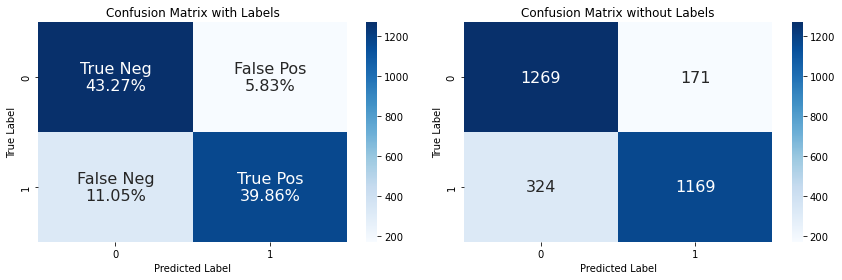

In [36]:
from sklearn.metrics import confusion_matrix
train_cm= confusion_matrix(testY, y_pred)

# Define labels for the four quadrants of the confusion matrix
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

# Reshape confusion matrix into a 1D array for plotting
train_cm_array = train_cm.ravel()

# Compute percentage values for each quadrant
percentages = ['{0:.2%}'.format(value) for value in train_cm_array / np.sum(train_cm_array)]

# Combine labels and percentages into a list of strings for plotting
labels = [f"{v1}\n{v2}" for v1, v2 in zip(labels, percentages)]

# Reshape labels into a 2D array for plotting
labels = np.asarray(labels).reshape(2,2)


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot with labels
#sns.set(font_scale=1.4, ax=axes[0])
sns.heatmap(train_cm, annot=labels, annot_kws={"size": 16}, cmap='Blues', fmt='', ax=axes[0])
axes[0].set_title('Confusion Matrix with Labels')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Plot without labels
#sns.set(font_scale=1.4, ax=axes[1])
sns.heatmap(train_cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=axes[1])
axes[1].set_title('Confusion Matrix without Labels')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()


In [37]:
print(mean(accuracy_list))

0.8473988608577243


C:\Users\Subhojit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


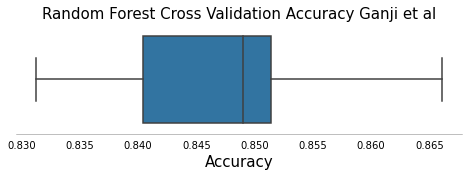

In [38]:
# Create a new figure with a larger size
plt.figure(figsize=(8,2))

# Create the boxplot with a custom title and color
ax = sns.boxplot(np.array(accuracy_list))
#sns.set(style='white')
#sns.set_palette('default')
plt.title('Random Forest Cross Validation Accuracy Ganji et al', fontsize=15)  # Set font size of title
plt.xlabel('Accuracy', fontsize=15)  # Set font size of x-label

# Remove top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Remove left and bottom ticks
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')

# Remove left and bottom spines and set their color to gray
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(0.5)

# Display the plot
plt.show()


## Feature Importance

In [39]:
clf.feature_importances_

array([0.00417016, 0.00431471, 0.00392102, 0.00414652, 0.00412951,
       0.00417945, 0.00404716, 0.00442366, 0.00423656, 0.00379988,
       0.00403678, 0.00403547, 0.00429521, 0.00397805, 0.00404729,
       0.00390732, 0.00424703, 0.0038779 , 0.00417322, 0.0040673 ,
       0.00412121, 0.00396195, 0.00390524, 0.00433032, 0.00391265,
       0.00407122, 0.00375474, 0.00376333, 0.00421759, 0.00431745,
       0.00410389, 0.00436016, 0.00388645, 0.00450287, 0.00395286,
       0.00353892, 0.00425265, 0.00408019, 0.00431378, 0.00440455,
       0.00418397, 0.00433029, 0.00450384, 0.00407159, 0.00429453,
       0.00447616, 0.00422734, 0.00392662, 0.00417233, 0.00429615,
       0.00414984, 0.00430916, 0.00471544, 0.00395642, 0.00462158,
       0.00450979, 0.00490989, 0.00416318, 0.00497475, 0.00468821,
       0.00449035, 0.00417046, 0.00440773, 0.00428135, 0.00471621,
       0.0046916 , 0.00540189, 0.01987961, 0.14307679, 0.2303669 ,
       0.03920529, 0.01139244, 0.02380893, 0.05163849, 0.02061

In [40]:
clf.feature_importances_.shape

(99,)

In [41]:
X_train.columns

Index([-80, -79, -78, -77, -76, -75, -74, -73, -72, -71, -70, -69, -68, -67,
       -66, -65, -64, -63, -62, -61, -60, -59, -58, -57, -56, -55, -54, -53,
       -52, -51, -50, -49, -48, -47, -46, -45, -44, -43, -42, -41, -40, -39,
       -38, -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25,
       -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11,
       -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,   3,
         4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,
        18],
      dtype='object')

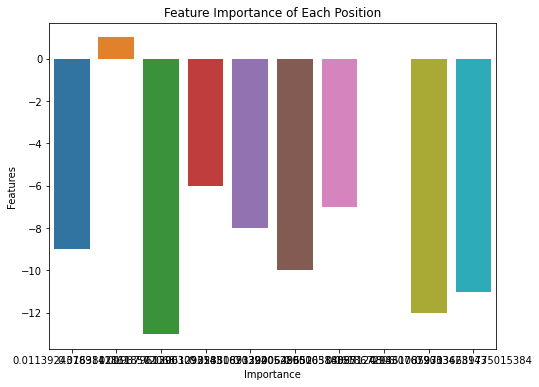

In [42]:
imp_df= pd.DataFrame({
    "Features": X_train.columns,
    "Importance": clf.feature_importances_
})

fi= imp_df.sort_values(by="Importance",ascending=False)

fi2=fi.head(10)
plt.figure(figsize=(8,6))
sns.barplot(data=fi2, x="Importance", y="Features")
plt.title('Feature Importance of Each Position')
plt.show()

In [43]:
feature_importance= pd.DataFrame(clf.feature_importances_)
feature_importance.reset_index(drop=False, inplace=True)
feature_importance['indice']= new_columns
feature_importance

,index,0,indice
0,0,0.004170,-80
1,1,0.004315,-79
2,2,0.003921,-78
3,3,0.004147,-77
4,4,0.004130,-76
...,...,...,...
94,94,0.004196,14
95,95,0.003765,15
96,96,0.003976,16
97,97,0.003913,17


[Text(0.5, 0, 'features'),
 Text(0, 0.5, 'importance'),
 Text(0.5, 1.0, 'feature importance')]

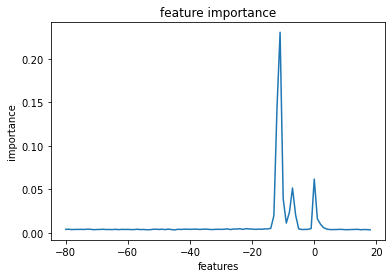

In [44]:
plot= sns.lineplot(x='indice', y=0, data=feature_importance)
plot.set(xlabel ="features", ylabel = "importance", title ='feature importance')

In [45]:
print("Accuracy:",metrics.accuracy_score(testY, y_pred))
print("Precision:",metrics.precision_score(testY, y_pred))
print("Recall:",metrics.recall_score(testY, y_pred))
print("f1_score:",metrics.f1_score(testY, y_pred))

Accuracy: 0.8312308216842823
Precision: 0.8723880597014926
Recall: 0.7829872739450771
f1_score: 0.8252735615954818


C:\Users\Subhojit\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


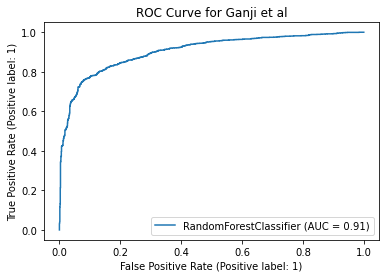

In [46]:
roc_curve= metrics.plot_roc_curve(clf, testX, testY)
roc_curve.ax_.set_title("ROC Curve for Ganji et al")
plt.show()

C:\Users\Subhojit\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


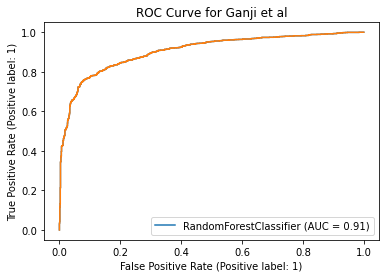

In [47]:
import pandas as pd

# Assuming roc_curve is the object returned by metrics.plot_roc_curve
roc_curve = metrics.plot_roc_curve(clf, testX, testY)

# Extract the data points from roc_curve
fpr = roc_curve.fpr
tpr = roc_curve.tpr

# Create a DataFrame
roc_df = pd.DataFrame({'False Positive Rate': fpr, 'True Positive Rate': tpr})

roc_df.to_csv('d:/ROC Curve data/downstream_perez_RNA_rf_roc_df.csv', index=False)

# Plot the ROC curve from the DataFrame
plt.plot(roc_df['False Positive Rate'], roc_df['True Positive Rate'])
plt.title("ROC Curve for Ganji et al")
plt.show()


# Using Shapley

In [45]:
!pip install shap

In [242]:
import shap


In [243]:
promoter.shape

(14669, 100)

### X_PCA promotor

In [244]:
import random

# set the random seed to ensure reproducibility
#random.seed(123)

# generate 40 random numbers between 1 to 15000
random_numbers = [random.randint(1, 10000) for _ in range(40)]

# print the random numbers
print(random_numbers)


[3991, 4378, 3910, 8142, 4635, 4780, 6472, 2610, 6965, 6878, 4977, 3854, 7597, 5175, 4294, 1012, 505, 3980, 9778, 9504, 737, 1363, 3189, 1775, 5585, 1321, 4121, 232, 1924, 7402, 6263, 8092, 2495, 3543, 4993, 2939, 4785, 77, 5234, 6919]


In [245]:
X_PCA_promoters = X.loc[[8499, 6345, 8807, 5017, 2395, 4771, 6378, 6038, 2073, 8765, 
                         5534, 8473, 1959, 2733, 9656, 6329, 7081, 1017, 2229, 7451, 338, 5727, 7369, 7392, 4978, 7029, 463, 2599, 8546, 
                         5323, 8468, 8434, 9119, 2251, 5630, 8195, 1717, 8937, 6046, 3685]]

In [246]:
X_PCA_promoters

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,9,10,11,12,13,14,15,16,17,18
8499,-2.17,-2.18,-1.76,-1.44,-2.81,-1.44,-1.46,-2.99,-1.46,-2.18,...,-2.99,-1.42,-2.99,-1.76,-1.42,-1.76,-2.18,-2.81,-1.42,-2.99
6345,-2.81,-1.44,-2.81,-1.44,-1.76,-2.99,-1.42,-2.18,-2.17,-2.18,...,-1.44,-1.95,-1.46,-2.18,-1.46,-2.81,-1.44,-1.76,-2.18,-1.46
8807,-1.44,-1.76,-2.99,-1.42,-2.99,-1.46,-1.44,-1.76,-2.18,-1.46,...,-1.95,-1.44,-1.76,-2.99,-1.42,-2.18,-2.17,-1.95,-1.95,-2.18
5017,-2.81,-1.44,-2.17,-1.44,-2.81,-1.95,-1.95,-1.44,-2.81,-1.52,...,-2.81,-1.76,-1.42,-2.18,-2.81,-1.76,-1.42,-2.81,-1.95,-2.18
2395,-1.44,-1.46,-2.18,-1.46,-2.81,-2.18,-1.44,-1.46,-1.76,-1.76,...,-2.17,-1.95,-1.52,-2.17,-1.95,-2.18,-1.46,-1.95,-1.95,-1.95
4771,-1.46,-2.81,-1.44,-2.18,-2.81,-1.46,-1.95,-1.44,-1.76,-2.99,...,-2.18,-1.76,-1.76,-1.44,-2.81,-1.42,-2.18,-2.17,-1.44,-2.99
6378,-2.18,-1.46,-1.76,-2.99,-1.44,-2.81,-1.44,-1.95,-2.17,-1.52,...,-1.76,-2.99,-1.44,-1.95,-2.81,-1.46,-1.52,-1.95,-2.17,-1.44
6038,-1.46,-1.52,-2.17,-2.18,-1.46,-1.52,-2.81,-1.46,-1.52,-2.17,...,-1.52,-2.17,-1.95,-2.18,-1.46,-2.18,-1.42,-2.18,-2.17,-1.52
2073,-1.42,-2.81,-1.52,-1.46,-2.99,-1.44,-1.46,-2.99,-1.44,-2.81,...,-2.17,-2.18,-1.44,-1.95,-2.17,-1.95,-1.95,-1.52,-2.17,-2.18
8765,-1.44,-1.95,-2.17,-1.52,-2.81,-1.76,-1.44,-2.17,-2.18,-1.76,...,-2.17,-1.44,-2.99,-1.76,-1.46,-1.95,-2.18,-1.46,-1.52,-2.17


In [247]:
explainer = shap.KernelExplainer(clf.predict, X_PCA_promoters)
shap_values = explainer.shap_values(X_PCA_promoters)

  0%|          | 0/40 [00:00<?, ?it/s]

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

In [248]:
shap_file = pd.DataFrame(shap_values)
shap_train_csv_file = 'shap_train.csv'

with open(shap_train_csv_file, mode='w') as f:
    shap_file.to_csv(f)

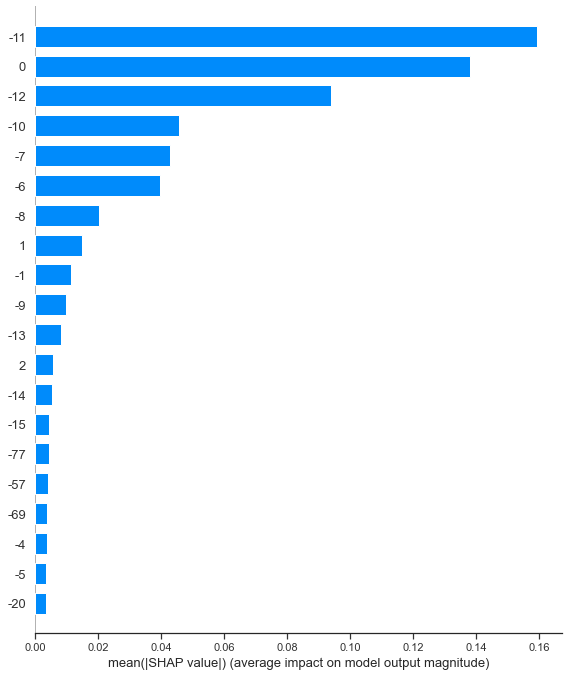

In [249]:
shap.summary_plot(shap_values,X_PCA_promoters, plot_type="bar", feature_names = X_PCA_promoters.columns)

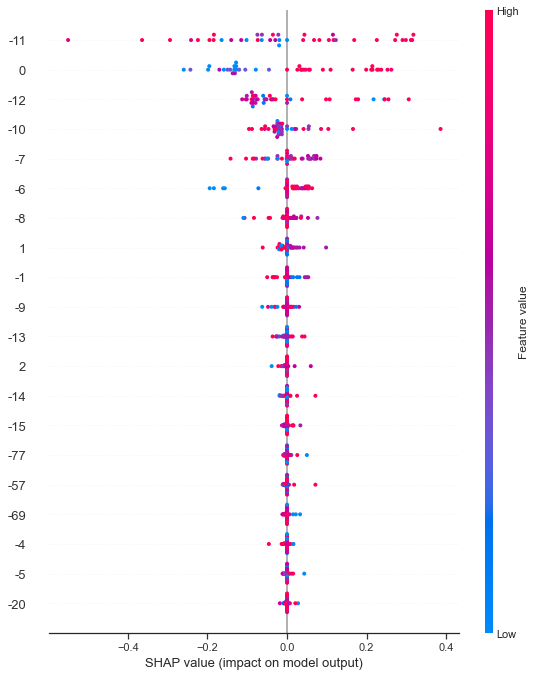

In [250]:
shap.summary_plot(shap_values, X_PCA_promoters, feature_names = X_PCA_promoters.columns)

AttributeError: 'int' object has no attribute 'split'

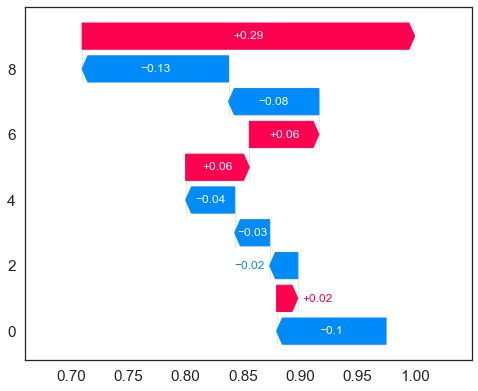

In [253]:
shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[4], feature_names = X_PCA_promoters.columns)

In [254]:
shap.initjs()
shap.plots.force(explainer.expected_value, shap_values, feature_names = X_PCA_promoters.columns)

In [255]:
shap.initjs()
shap.plots.force(explainer.expected_value,shap_values[0], feature_names = X_PCA_promoters.columns)

# Test Organism Predictions

## Test Data

In [48]:
# Load the Test organisms dataset into a DataFrame
klebsiella = pd.read_csv(r"D:\ten organism\perez(RNA)\test organism\stability_Sequences_80-20_sequences Klebsiella pneumoniae_output.csv")
salmonella= pd.read_csv(r"D:\ten organism\perez(RNA)\test organism\stability_Sequences_80-20_sequences Salmonella enterica_output.csv")
klebsiella_downstream= pd.read_csv(r"D:\downstream control\perez(RNA)\result\test organism\stability_Klebsiella pneumoniae_output.csv")
salmonella_downstream= pd.read_csv(r"D:\downstream control\perez(RNA)\result\test organism\stability_Salmonella enterica_output.csv")

# Remove any irrelevant columns
test_organism = pd.concat([klebsiella,salmonella])
test_organism.columns=new_columns
test_organism.reset_index(drop=True, inplace=True)

test_organism_downstream= pd.concat([klebsiella_downstream,salmonella_downstream])
test_organism_downstream.columns=new_columns
test_organism_downstream.reset_index(drop=True, inplace=True)

test_without_labels= pd.concat([test_organism, test_organism_downstream])


In [49]:
test_line= pd.DataFrame(test_organism.mean())
test_line.reset_index(drop=False, inplace=True)
downstream_test_line=pd.DataFrame(test_organism_downstream.mean())
downstream_test_line.reset_index(drop= False, inplace=True)



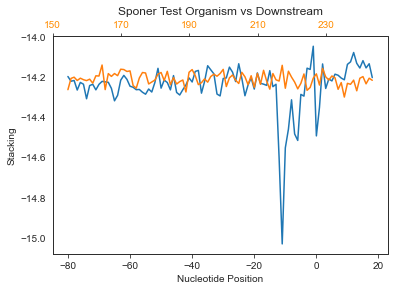

In [50]:
import matplotlib.ticker as ticker

sns.set_style('white')
# create the Seaborn line plots
plot = sns.lineplot(x='index', y=0, data=test_line)
plot = sns.lineplot(x='index', y=0, data=downstream_test_line)

# create a twin Axes object for the new x-axis
ax2 = plot.twiny()

# set the new x-axis tick positions and labels
ax2.set_xticks(downstream_line.index)
ax2.set_xticklabels(downstream_line['downstream position'], color='darkorange')

# set the gap between the tick labels
ax2.xaxis.set_major_locator(ticker.MultipleLocator(20))

# set the x-axis and y-axis labels and title
plot.set(xlabel="Nucleotide Position", ylabel="Stacking", title='Sponer Test Organism vs Downstream')

# show the plot
plt.show()


## Test Labels

In [51]:
test_organism_lables= np.ones(test_organism.shape[0], dtype=int)
test_downstream_labels= np.zeros(test_organism_downstream.shape[0], dtype=int)

test_labels = np.concatenate((test_organism_lables, test_downstream_labels))

In [52]:
test_without_labels.shape

(4620, 99)

## Test Prediction in One Go

In [53]:
# Create an array of ones with the same number of rows as the new dataset
#true_labels = np.ones(test_organism.shape[0], dtype=int)

# Make predictions on the new data
test_organism_pred = clf.predict(test_without_labels)

# Calculate the accuracy of the model on the new data
accuracy = metrics.accuracy_score(test_labels, test_organism_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9002164502164502


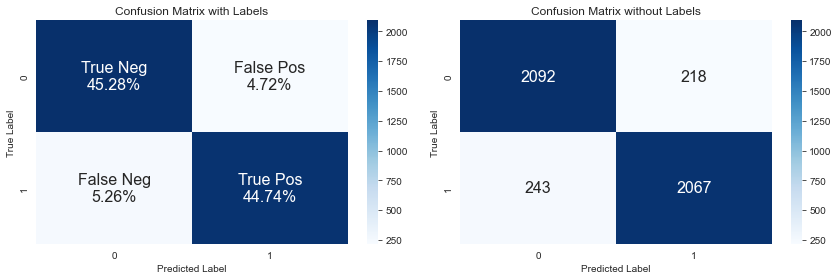

In [54]:
# Compute confusion matrix
cm = confusion_matrix(test_labels, test_organism_pred)

# Define labels for the four quadrants of the confusion matrix
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

# Reshape confusion matrix into a 1D array for plotting
cm_array = cm.ravel()

# Compute percentage values for each quadrant
percentages = ['{0:.2%}'.format(value) for value in cm_array / np.sum(cm_array)]

# Combine labels and percentages into a list of strings for plotting
labels = [f"{v1}\n{v2}" for v1, v2 in zip(labels, percentages)]

# Reshape labels into a 2D array for plotting
labels = np.asarray(labels).reshape(2,2)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot with labels
#sns.set(font_scale=1.4, ax=axes[0])
sns.heatmap(cm, annot=labels, annot_kws={"size": 16}, cmap='Blues', fmt='', ax=axes[0])
axes[0].set_title('Confusion Matrix with Labels')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Plot without labels
#sns.set(font_scale=1.4, ax=axes[1])
sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=axes[1])
axes[1].set_title('Confusion Matrix without Labels')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()


## Test Prediction in 10 splits

In [55]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score

In [56]:
# Convert DataFrame to numpy array
if isinstance(test_without_labels, pd.DataFrame):
    test_without_labels = test_without_labels.to_numpy()

# Split data into 10 equal parts
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

test_accuracy = []
test_precision = []
test_recall = []
test_f1_score = []
test_mcc = []
test_specificity = []
all_cms = []

# Perform predictions on each part
for i, (train_index, test_index) in enumerate(skf.split(test_without_labels, test_labels)):
    print(f"Fold {i+1}/{n_splits}")
    
    # Split data into train and test sets for this fold
    X_test = test_without_labels[test_index]
    y_test = test_labels[test_index]
    
    # Make predictions on the test set for this fold
    y_pred = clf.predict(X_test)
    
    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    test_accuracy.append(accuracy)
    test_precision.append(precision)
    test_recall.append(recall)
    test_f1_score.append(f1)
    
    # Calculate confusion matrix for this fold
    cm = confusion_matrix(y_test, y_pred)
    all_cms.append(cm)
    
    # Calculate MCC
    mcc = matthews_corrcoef(y_test, y_pred)
    test_mcc.append(mcc)
    
    # Calculate specificity
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    test_specificity.append(specificity)
    
    print(" Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}, MCC: {}, Specificity: {}".format(
        test_accuracy[-1], test_precision[-1], test_recall[-1], test_f1_score[-1], test_mcc[-1], test_specificity[-1]))

Fold 1/10
 Accuracy: 0.8831168831168831, Precision: 0.8968609865470852, Recall: 0.8658008658008658, F1 Score: 0.881057268722467, MCC: 0.7666936818777416, Specificity: 0.9004329004329005
Fold 2/10
 Accuracy: 0.8874458874458875, Precision: 0.8594377510040161, Recall: 0.9264069264069265, F1 Score: 0.8916666666666667, MCC: 0.7772550558698827, Specificity: 0.8484848484848485
Fold 3/10
 Accuracy: 0.8787878787878788, Precision: 0.9032258064516129, Recall: 0.8484848484848485, F1 Score: 0.875, MCC: 0.7589709258986453, Specificity: 0.9090909090909091
Fold 4/10
 Accuracy: 0.8982683982683982, Precision: 0.9, Recall: 0.8961038961038961, F1 Score: 0.8980477223427332, MCC: 0.7965442603023951, Specificity: 0.9004329004329005
Fold 5/10
 Accuracy: 0.9329004329004329, Precision: 0.9310344827586207, Recall: 0.935064935064935, F1 Score: 0.9330453563714903, MCC: 0.8658089785895599, Specificity: 0.9307359307359307
Fold 6/10
 Accuracy: 0.9025974025974026, Precision: 0.918918918918919, Recall: 0.88311688311688

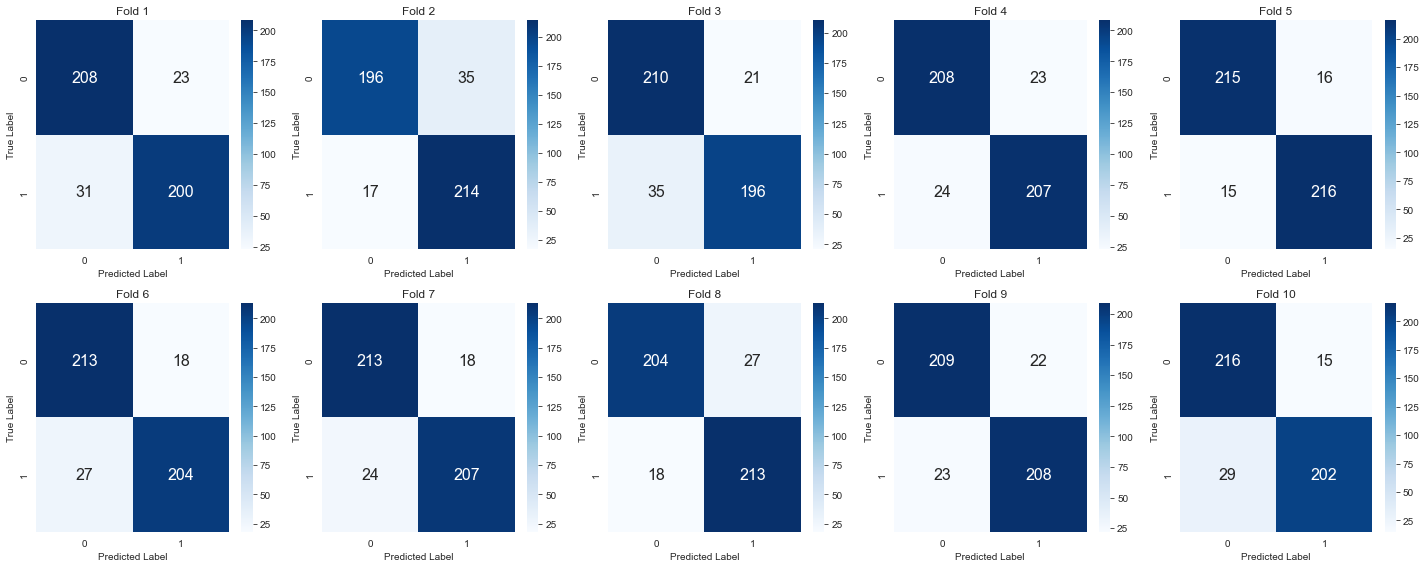

In [57]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(20, 8))
for i, ax in enumerate(axs.flatten()):
    if i < len(all_cms):
        cm = all_cms[i]
        sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=ax)
        ax.set_title(f"Fold {i+1}")
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()


In [58]:
test_accuracy

[0.8831168831168831,
 0.8874458874458875,
 0.8787878787878788,
 0.8982683982683982,
 0.9329004329004329,
 0.9025974025974026,
 0.9090909090909091,
 0.9025974025974026,
 0.9025974025974026,
 0.9047619047619048]

In [59]:
test_precision

[0.8968609865470852,
 0.8594377510040161,
 0.9032258064516129,
 0.9,
 0.9310344827586207,
 0.918918918918919,
 0.92,
 0.8875,
 0.9043478260869565,
 0.9308755760368663]

- Precision equal to 1.0 means that all the positive predictions made by the classifier are correct. 
- In other words, the classifier didn't make any false positive predictions. 

In [60]:
test_recall

[0.8658008658008658,
 0.9264069264069265,
 0.8484848484848485,
 0.8961038961038961,
 0.935064935064935,
 0.8831168831168831,
 0.8961038961038961,
 0.922077922077922,
 0.9004329004329005,
 0.8744588744588745]

In [61]:
test_specificity

[0.9004329004329005,
 0.8484848484848485,
 0.9090909090909091,
 0.9004329004329005,
 0.9307359307359307,
 0.922077922077922,
 0.922077922077922,
 0.8831168831168831,
 0.9047619047619048,
 0.935064935064935]

In [62]:
test_f1_score

[0.881057268722467,
 0.8916666666666667,
 0.875,
 0.8980477223427332,
 0.9330453563714903,
 0.9006622516556292,
 0.9078947368421053,
 0.9044585987261146,
 0.9023861171366594,
 0.9017857142857143]

In [63]:
test_mcc

[0.7666936818777416,
 0.7772550558698827,
 0.7589709258986453,
 0.7965442603023951,
 0.8658089785895599,
 0.8058066296105563,
 0.8184579511016549,
 0.8058066296105563,
 0.8052023500882907,
 0.8110146465316953]

## Antisense Promoters with Downstream

###### Bacteria Names
- Chlamydia pneumoniae
- Corynebacterium glutamicum
- Helicobactor pylori
- Mycobacterium tuberculosis
- Nostoc sp
- Pseudomonas aeruginosa
- Salmonella enterica
- Streptomyces coelicolor
- Synechocystis sp

In [64]:
antisense= pd.read_csv(r"D:\Other promoters\Downstream sequences\Antisense\Antisense promoter vs downstream\Antisense perez_RNA promoter vs downstream.csv")
antisense

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-16.0,-14.0,-11.1,-14.2,-15.4,-13.7,-14.2,-14.0,-13.7,-13.7,...,-11.1,-14.4,-13.7,-13.7,-13.7,-14.0,-14.2,-13.7,-14.0,1
1,-14.2,-13.7,-14.0,-16.9,-15.6,-14.2,-15.4,-16.0,-13.7,-14.0,...,-13.7,-14.0,-16.9,-14.4,-15.4,-14.2,-11.1,-14.4,-13.7,1
2,-13.7,-14.2,-14.4,-15.4,-14.4,-14.2,-15.4,-16.0,-15.4,-16.0,...,-14.0,-16.9,-14.0,-14.2,-15.6,-13.8,-16.0,-13.7,-13.7,1
3,-14.2,-14.0,-16.0,-14.0,-14.2,-13.7,-14.0,-16.9,-14.0,-14.4,...,-14.4,-11.1,-14.2,-14.0,-14.2,-13.7,-13.7,-15.4,-14.4,1
4,-14.0,-11.1,-13.8,-16.0,-13.7,-13.7,-15.4,-16.0,-13.8,-11.1,...,-14.4,-14.0,-11.1,-16.9,-11.1,-11.1,-14.0,-14.2,-14.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12163,-15.6,-13.8,-13.7,-13.7,-14.2,-11.1,-11.1,-11.1,-14.0,-13.7,...,-13.7,-14.2,-14.4,-15.4,-14.2,-15.6,-13.8,-14.2,-11.1,0
12164,-13.7,-14.2,-14.0,-13.7,-14.2,-15.6,-11.1,-13.8,-14.4,-16.9,...,-13.8,-11.1,-15.6,-11.1,-14.2,-14.0,-16.9,-15.6,-14.2,0
12165,-14.0,-14.4,-14.2,-15.4,-14.4,-11.1,-11.1,-11.1,-14.2,-14.0,...,-13.8,-14.0,-16.0,-13.7,-13.8,-14.4,-14.0,-16.9,-11.1,0
12166,-13.7,-14.0,-14.2,-15.4,-13.7,-14.4,-16.9,-15.6,-11.1,-11.1,...,-11.1,-11.1,-14.2,-13.8,-14.0,-13.7,-13.7,-16.0,-14.0,0


In [65]:
antisense_promoter= antisense.drop(columns=['label'])
antisense_label= antisense['label']

In [66]:
# Convert DataFrame to numpy array
if isinstance(antisense_promoter, pd.DataFrame):
    antisense_promoter = antisense_promoter.to_numpy()

# Split data into 10 equal parts
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

antisense_accuracy = []
antisense_precision=[]
antisense_recall=[]
antisense_f1_score=[]
antisense_cms = []
antisense_mcc = []
antisense_specificity = []

# Perform predictions on each part
for i, (train_index, test_index) in enumerate(skf.split(antisense_promoter, antisense_label)):
    print(f"Fold {i+1}/{n_splits}")
    
    # Split data into train and test sets for this fold
    X_test = antisense_promoter[test_index]
    y_test = antisense_label[test_index]
    
    # Make predictions on the test set for this fold
    y_pred = clf.predict(X_test)
    
    
    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    antisense_accuracy.append(accuracy)
    antisense_precision.append(precision)
    antisense_recall.append(recall)
    antisense_f1_score.append(f1)
    
    # Calculate MCC
    mcc = matthews_corrcoef(y_test, y_pred)
    antisense_mcc.append(mcc)
    
    # Calculate specificity
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    antisense_specificity.append(specificity)
    
    print(" Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}, MCC: {}, Specificity: {}".format(
    antisense_accuracy[-1], antisense_precision[-1], antisense_recall[-1], antisense_f1_score[-1],
    antisense_mcc[-1], antisense_specificity[-1]))

    #fold_no += 1

    # Calculate confusion matrix for this fold
    cm = confusion_matrix(y_test, y_pred)
    antisense_cms.append(cm)


Fold 1/10
 Accuracy: 0.8225143796220213, Precision: 0.8527827648114902, Recall: 0.7799671592775042, F1 Score: 0.8147512864493998, MCC: 0.6474214185934448, Specificity: 0.935064935064935
Fold 2/10
 Accuracy: 0.8200493015612161, Precision: 0.8327645051194539, Recall: 0.8013136288998358, F1 Score: 0.8167364016736403, MCC: 0.640567255750011, Specificity: 0.8651315789473685
Fold 3/10
 Accuracy: 0.8216926869350862, Precision: 0.8414634146341463, Recall: 0.7931034482758621, F1 Score: 0.8165680473372782, MCC: 0.6444688433181516, Specificity: 0.8388157894736842
Fold 4/10
 Accuracy: 0.8274445357436319, Precision: 0.8433734939759037, Recall: 0.8045977011494253, F1 Score: 0.8235294117647061, MCC: 0.6555962698045633, Specificity: 0.850328947368421
Fold 5/10
 Accuracy: 0.8340180772391126, Precision: 0.8586572438162544, Recall: 0.7993421052631579, F1 Score: 0.82793867120954, MCC: 0.6696142316009869, Specificity: 0.850328947368421
Fold 6/10
 Accuracy: 0.8274445357436319, Precision: 0.8262295081967214,

In [67]:
antisense_accuracy

[0.8225143796220213,
 0.8200493015612161,
 0.8216926869350862,
 0.8274445357436319,
 0.8340180772391126,
 0.8274445357436319,
 0.8241577649958916,
 0.8307313064913723,
 0.8199013157894737,
 0.8240131578947368]

In [68]:
antisense_precision

[0.8527827648114902,
 0.8327645051194539,
 0.8414634146341463,
 0.8433734939759037,
 0.8586572438162544,
 0.8262295081967214,
 0.8350340136054422,
 0.8361204013377926,
 0.8370883882149047,
 0.8480565371024735]

In [69]:
antisense_recall

[0.7799671592775042,
 0.8013136288998358,
 0.7931034482758621,
 0.8045977011494253,
 0.7993421052631579,
 0.8289473684210527,
 0.8075657894736842,
 0.8223684210526315,
 0.7944078947368421,
 0.7894736842105263]

In [70]:
antisense_specificity

[0.935064935064935,
 0.8651315789473685,
 0.8388157894736842,
 0.850328947368421,
 0.850328947368421,
 0.8686371100164204,
 0.825944170771757,
 0.8407224958949097,
 0.8390804597701149,
 0.8453947368421053]

In [71]:
antisense_f1_score

[0.8147512864493998,
 0.8167364016736403,
 0.8165680473372782,
 0.8235294117647061,
 0.82793867120954,
 0.8275862068965518,
 0.8210702341137123,
 0.8291873963515755,
 0.8151898734177216,
 0.8177172061328791]

In [72]:
antisense_mcc

[0.6474214185934448,
 0.640567255750011,
 0.6444688433181516,
 0.6555962698045633,
 0.6696142316009869,
 0.654893307876891,
 0.6486562755698624,
 0.661547153973784,
 0.640635890609299,
 0.6495780301759799]

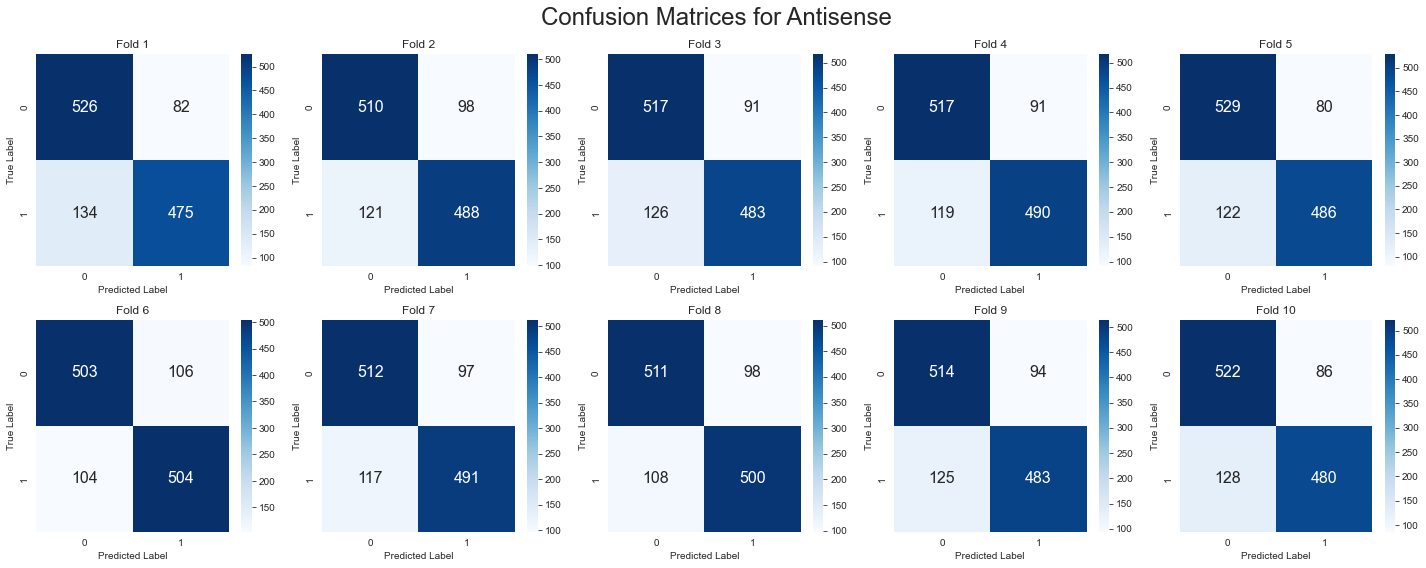

In [73]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(20, 8))
fig.suptitle("Confusion Matrices for Antisense", fontsize=24)

for i, ax in enumerate(axs.flatten()):
    if i < len(antisense_cms):
        cm = antisense_cms[i]
        sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=ax)
        ax.set_title(f"Fold {i+1}")
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()


## Internal Promoter with downstream

#### Bacteria Names
- Chlamydia pneumoniae
- Corynebacterium glutamicum
- E.coli
- Helicobactor pylori
- Klebsiella pneumoniae
- Mycobacterium tuberculosis
- Nostoc sp
- Pseudomonas aeruginosa
- Streptomyces coelicolor

In [74]:
internal= pd.read_csv(r"D:\Other promoters\Downstream sequences\Induced\Induced promoter vs downstream\Induced perez_RNA promoter vs downstream.csv")
internal

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-14.0,-14.2,-15.6,-13.8,-16.0,-13.8,-15.6,-11.1,-11.1,-14.2,...,-13.7,-14.0,-14.2,-13.7,-13.7,-13.7,-15.4,-14.2,-14.4,1
1,-15.4,-14.2,-14.4,-13.7,-13.7,-15.4,-13.7,-13.7,-16.0,-13.8,...,-14.4,-14.0,-16.9,-14.0,-13.7,-16.0,-15.4,-14.4,-16.9,1
2,-11.1,-11.1,-16.9,-11.1,-14.4,-15.4,-14.4,-16.9,-14.4,-14.0,...,-14.0,-16.9,-14.4,-13.7,-15.4,-13.7,-14.4,-16.9,-14.0,1
3,-13.8,-14.4,-13.7,-13.8,-14.0,-14.4,-14.2,-15.4,-13.7,-16.0,...,-13.7,-13.7,-13.8,-15.6,-14.2,-13.7,-13.7,-15.4,-14.2,1
4,-14.0,-14.2,-14.0,-13.7,-13.7,-16.0,-13.7,-13.7,-15.4,-14.2,...,-13.8,-14.4,-13.7,-14.0,-14.2,-13.7,-13.7,-13.7,-15.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12125,-11.1,-16.9,-11.1,-11.1,-14.4,-13.8,-15.6,-11.1,-16.9,-15.6,...,-14.4,-13.7,-13.8,-14.0,-14.2,-11.1,-11.1,-15.6,-11.1,0
12126,-11.1,-15.6,-14.2,-13.8,-15.6,-16.9,-14.4,-13.7,-14.0,-16.9,...,-11.1,-16.9,-15.6,-14.2,-13.7,-13.8,-11.1,-15.6,-16.9,0
12127,-13.7,-14.0,-14.2,-13.7,-14.0,-14.2,-13.8,-11.1,-15.6,-14.2,...,-14.4,-13.8,-15.6,-16.9,-11.1,-14.4,-13.8,-11.1,-14.4,0
12128,-16.9,-11.1,-15.6,-14.2,-13.7,-14.0,-14.2,-13.8,-11.1,-14.4,...,-16.9,-15.6,-11.1,-14.2,-15.4,-14.2,-15.6,-11.1,-16.9,0


In [75]:
internal_promoter= internal.drop(columns=['label'])
internal_label= internal['label']

In [76]:
# Convert DataFrame to numpy array
if isinstance(internal_promoter, pd.DataFrame):
    internal_promoter = internal_promoter.to_numpy()

# Split data into 10 equal parts
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

internal_accuracy = []
internal_precision=[]
internal_recall=[]
internal_f1_score=[]
internal_cms = []
internal_mcc = []
internal_specificity = []


# Perform predictions on each part
for i, (train_index, test_index) in enumerate(skf.split(internal_promoter, internal_label)):
    print(f"Fold {i+1}/{n_splits}")
    
    # Split data into train and test sets for this fold
    X_test = internal_promoter[test_index]
    y_test = internal_label[test_index]
    
    # Make predictions on the test set for this fold
    y_pred = clf.predict(X_test)
    
    # Calculate specificity
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    
    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    
    internal_accuracy.append(accuracy)
    internal_precision.append(precision)
    internal_recall.append(recall)
    internal_f1_score.append(f1)
    internal_mcc.append(mcc)
    internal_specificity.append(specificity)
    
    print(" Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}, MCC: {}, Specificity: {}".format(
    internal_accuracy[-1], internal_precision[-1], internal_recall[-1], internal_f1_score[-1],
    internal_mcc[-1], internal_specificity[-1]))
    #fold_no += 1

    # Calculate confusion matrix for this fold
    cm = confusion_matrix(y_test, y_pred)
    internal_cms.append(cm)


Fold 1/10
 Accuracy: 0.8037922506183017, Precision: 0.8360655737704918, Recall: 0.7561779242174629, F1 Score: 0.7941176470588236, MCC: 0.6104123209113146, Specificity: 0.8585526315789473
Fold 2/10
 Accuracy: 0.8112118713932399, Precision: 0.8487084870848709, Recall: 0.7578253706754531, F1 Score: 0.8006962576153177, MCC: 0.6260620367993404, Specificity: 0.8514851485148515
Fold 3/10
 Accuracy: 0.8128606760098929, Precision: 0.8345070422535211, Recall: 0.7808896210873146, F1 Score: 0.806808510638298, MCC: 0.6270385232895005, Specificity: 0.8646864686468647
Fold 4/10
 Accuracy: 0.8161582852431987, Precision: 0.8478260869565217, Recall: 0.771004942339374, F1 Score: 0.8075927523727352, MCC: 0.6349596459868811, Specificity: 0.8448844884488449
Fold 5/10
 Accuracy: 0.8070898598516076, Precision: 0.8312611012433393, Recall: 0.771004942339374, F1 Score: 0.8, MCC: 0.6158250595467276, Specificity: 0.8613861386138614
Fold 6/10
 Accuracy: 0.8194558944765046, Precision: 0.8388791593695272, Recall: 0.7

In [77]:
internal_accuracy

[0.8037922506183017,
 0.8112118713932399,
 0.8128606760098929,
 0.8161582852431987,
 0.8070898598516076,
 0.8194558944765046,
 0.830997526793075,
 0.8054410552349547,
 0.8186314921681781,
 0.8499587798845837]

In [78]:
internal_precision

[0.8360655737704918,
 0.8487084870848709,
 0.8345070422535211,
 0.8478260869565217,
 0.8312611012433393,
 0.8388791593695272,
 0.851138353765324,
 0.8257042253521126,
 0.8560885608856088,
 0.8854545454545455]

In [79]:
internal_recall

[0.7561779242174629,
 0.7578253706754531,
 0.7808896210873146,
 0.771004942339374,
 0.771004942339374,
 0.7904290429042904,
 0.801980198019802,
 0.7739273927392739,
 0.7656765676567657,
 0.8036303630363036]

In [80]:
internal_specificity

[0.8585526315789473,
 0.8514851485148515,
 0.8646864686468647,
 0.8448844884488449,
 0.8613861386138614,
 0.8432343234323433,
 0.8484349258649094,
 0.8599670510708401,
 0.8369028006589786,
 0.871499176276771]

In [81]:
internal_f1_score

[0.7941176470588236,
 0.8006962576153177,
 0.806808510638298,
 0.8075927523727352,
 0.8,
 0.8139337298215802,
 0.8258283772302464,
 0.7989778534923339,
 0.8083623693379791,
 0.842560553633218]

In [82]:
internal_mcc

[0.6104123209113146,
 0.6260620367993404,
 0.6270385232895005,
 0.6349596459868811,
 0.6158250595467276,
 0.6399609649200162,
 0.6630838816443528,
 0.6120644120815105,
 0.6408095699520031,
 0.7028976270435161]

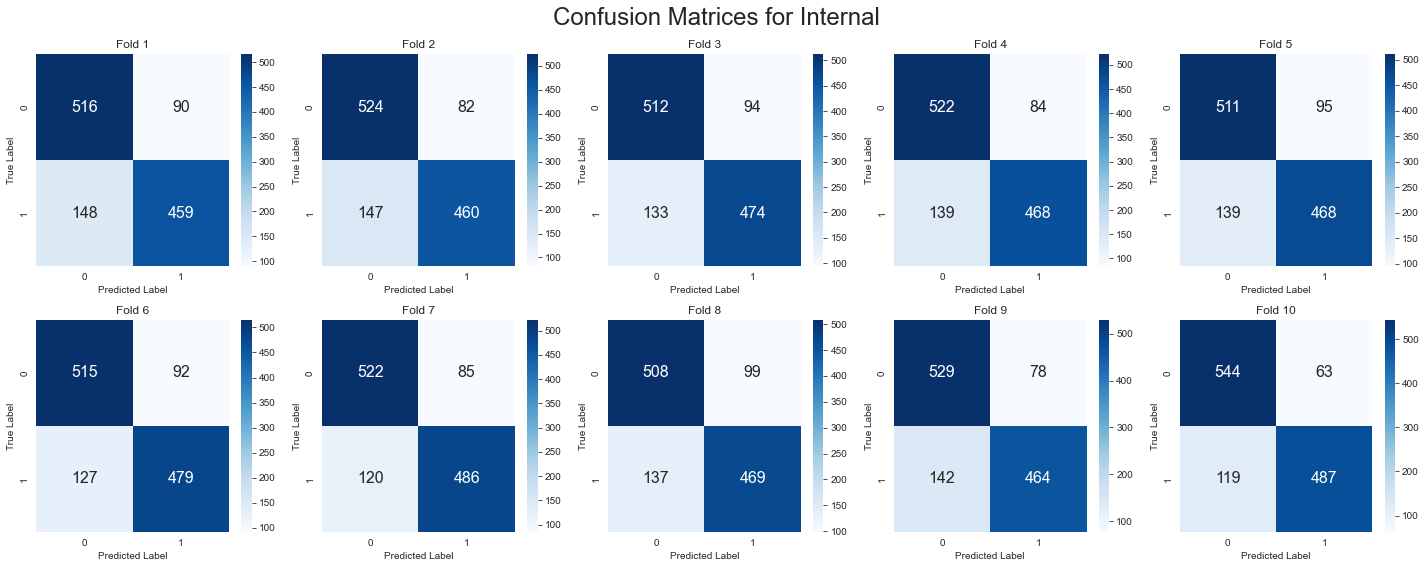

In [83]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(20, 8))
fig.suptitle("Confusion Matrices for Internal", fontsize=24)

for i, ax in enumerate(axs.flatten()):
    if i < len(internal_cms):
        cm = internal_cms[i]
        sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=ax)
        ax.set_title(f"Fold {i+1}")
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()
